__K-Nearest Neighbors__

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance

KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.

<img src='knn_1.png'>

Your task is to classify a new data point with 'X' into "Blue" class or "Red" class.

The coordinate values of the data point are x=45 and y=50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.

<img src='knn_2.png'>

The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong.

From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

__Pros and Cons of KNN__

Pros
- It is extremly easy to implement
- As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time prediction. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
- Since the algorithm requires no training before making predictions, new data can be added seamlessly.
- There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

Cons
- The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
- The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
- Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

We are going to use the famous iris data set for our KNN example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica

In [1]:
import pandas as pd
import numpy as np

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
df = pd.read_csv(url, names=names)

In [5]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# The next step is to split our dataset into its attributes and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also converges faster with normalized features.

In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# X_train, X_test

In [14]:
# Training and Prediction
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
y_pred = clf.predict(X_test)

In [16]:
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

__Evaluating the algorithm__

In [17]:
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, y_pred))

[[ 6  0  0]
 [ 0  9  1]
 [ 0  1 13]]


In [21]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.93      0.93      0.93        14

    avg / total       0.93      0.93      0.93        30



In [23]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [25]:
import matplotlib.pyplot as plt

Text(0,0.5,'mean Error')

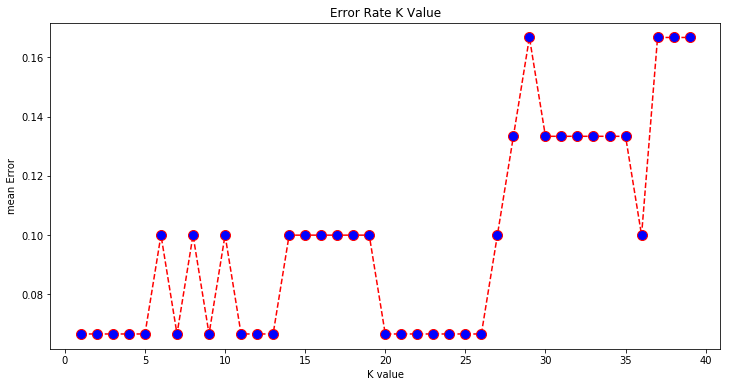

In [27]:
# Plot the error values against K values.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('mean Error')